# Patent Assignment Daily
Contains daily patent assignment text for 10/18/2016

## 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import nltk
import pandas as pd

# 2) Loading datset

In [4]:
assignments = pd.read_csv('patent_assignment.csv', index_col= 0)

In [5]:
assignments.head()

,last-update-date,patent-assignees,patent-assignors,patent-countries,patent-dates,patent-kinds,patent-numbers,recorded-date,title
0,20161018,FASTCASE,"WALTERS, EDWARD J. III|ROSENTHAL, PHILIP J.",US|US,20001108|20161018,X0|B1,09707911|9471672,20010320,Relevance sorting for database searches
1,20161018,ANABASIS SRL,"LAMBIASE, ALESSANDRO",US|US,20010726|20161018,X0|B1,09890088|9468665,20010720,METHOD OF TREATING INTRAOCCULAR TISSUE PATHOLO...
2,20161018,QUALCOMM INCORPORATED,"WALTON, J. RODNEY|KETCHUM, JOHN W.",US|US|US,20031201|20050602|20161018,X0|A1|B2,10725904|20050120097|9473269,20031201,METHOD AND APPARATUS FOR PROVIDING AN EFFICIEN...
3,20161018,INTERNATIONAL BUSINESS MACHINES CORPORATION,"MORARIU, JANIS A.|STAPEL, STEVEN W.|STRAACH, J...",US|US|US,20040622|20051222|20161018,X0|A1|B2,10873346|20050282136|9472114,20040903,"COMPUTER-IMPLEMENTED METHOD, SYSTEM AND PROGRA..."
4,20161018,INTERNATIONAL BUSINESS MACHINES CORPORATION,"LI, XIN|ROBERTS, GREGORY WAYNE",US|US|US,20041019|20060420|20161018,X0|A1|B2,10967958|20060085754|9471332,20050208,Selecting graphical component types at runtime


In [6]:
assignments.shape

(7530, 9)

## Checking missing values in data

In [7]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [8]:
missing_values = find_missing_values(assignments, columns=assignments.columns)
missing_values

Number of missing or NaN values for each column:


{'last-update-date': 0,
 'patent-assignees': 0,
 'patent-assignors': 0,
 'patent-countries': 0,
 'patent-dates': 143,
 'patent-kinds': 1,
 'patent-numbers': 0,
 'recorded-date': 0,
 'title': 8}

In [9]:
patent=assignments['title']

chars = list(set(patent)) 
data_size, vocab_size = len(patent), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 7530
Patent data has unique chars 6441


**As title has 8 missing values and it is our feature to be considered.So, we have to deal with it.<br>**

### Creating a dataframe for data exploring

In [10]:
data_text = assignments[['title']]

In [11]:
data_text[:5]

,title
0,Relevance sorting for database searches
1,METHOD OF TREATING INTRAOCCULAR TISSUE PATHOLO...
2,METHOD AND APPARATUS FOR PROVIDING AN EFFICIEN...
3,"COMPUTER-IMPLEMENTED METHOD, SYSTEM AND PROGRA..."
4,Selecting graphical component types at runtime


In [12]:
data_text['index'] = data_text.index
documents = data_text

In [13]:
documents.head()

,title,index
0,Relevance sorting for database searches,0
1,METHOD OF TREATING INTRAOCCULAR TISSUE PATHOLO...,1
2,METHOD AND APPARATUS FOR PROVIDING AN EFFICIEN...,2
3,"COMPUTER-IMPLEMENTED METHOD, SYSTEM AND PROGRA...",3
4,Selecting graphical component types at runtime,4


In [14]:
print(len(documents))

7530


In [15]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

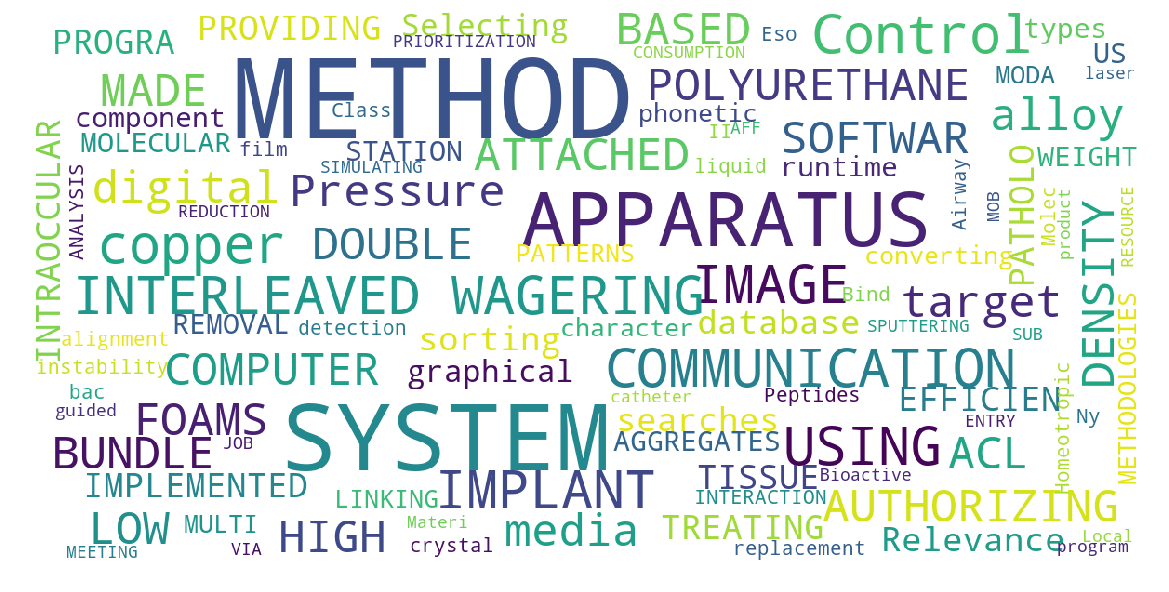

In [16]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(assignments['title'].dropna())

## 3) Cleaning and Preprocessing

In [17]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
# Example
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


In [20]:
#Example of stemmer
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [21]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [22]:
doc_sample = documents[documents['index'] == 4310].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['METHOD', 'AND', 'SYSTEM', 'FOR', 'ACHIEVING', 'MOVING', 'SYNCHRONIZATION', 'IN', 'REMOTE', 'CONTROL', 'AND', 'COMPUTER', 'STORAGE', 'MEDIUM']


 tokenized and lemmatized document: 
['method', 'achiev', 'move', 'synchron', 'remot', 'control', 'storag', 'medium']


**It's time to fix missing value issue as we had seen in start. We may  fill all nans with empty string and then all numbers to string type and then map**

In [23]:
processed_docs = documents['title'].fillna('').astype(str).map(preprocess)

In [24]:
processed_docs[:10]

0                       [relev, sort, databas, search]
1    [method, treat, intraoccular, tissu, patholog,...
2    [method, apparatus, provid, effici, control, c...
3    [implement, method, program, product, provid, ...
4              [select, graphic, compon, type, runtim]
5    [remov, high, molecular, weight, aggreg, hydro...
6    [communic, station, communic, transpond, commu...
7    [method, apparatus, convert, phonet, languag, ...
8    [methodolog, link, pattern, multi, modal, data...
9    [control, digit, media, charact, replac, perso...
Name: title, dtype: object

In [25]:
df = pd.DataFrame({'Patent_titles':processed_docs})
df.head()

,Patent_titles
0,"[relev, sort, databas, search]"
1,"[method, treat, intraoccular, tissu, patholog,..."
2,"[method, apparatus, provid, effici, control, c..."
3,"[implement, method, program, product, provid, ..."
4,"[select, graphic, compon, type, runtim]"


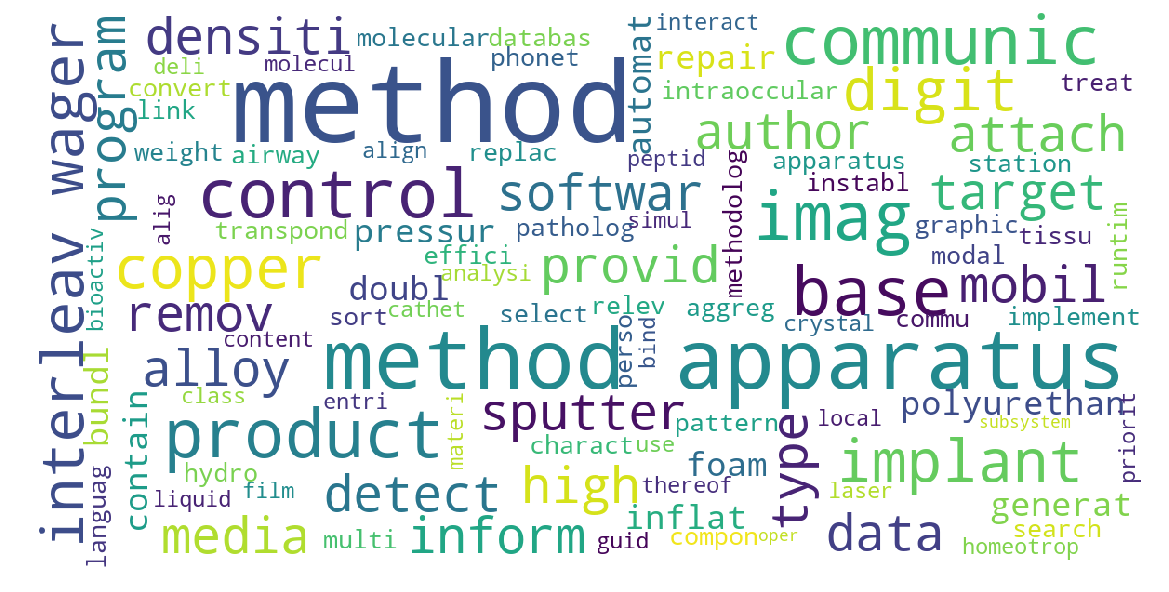

In [26]:
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(df["Patent_titles"].dropna())

## Bag of words

In [27]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [28]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 databas
1 relev
2 search
3 sort
4 factor
5 growth
6 intraoccular
7 method
8 nerv
9 patholog
10 tissu


Filter out tokens that appear in
- less than 15 documents (absolute number) or
- more than 0.5 documents (fraction of total corpus size, not absolute number).
- after the above two steps, keep only the first 100000 most frequent tokens.

In [29]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [30]:
print (dictionary[6],dictionary[14],dictionary[136],dictionary[1060])

method control medium storag


**Dictionary contains words. All of our data word.**

In [31]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(6, 1), (14, 1), (136, 1), (183, 1), (754, 1), (925, 1), (1060, 1), (1085, 1)]

In [32]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 6 ("method") appears 1 time.
Word 14 ("control") appears 1 time.
Word 136 ("medium") appears 1 time.
Word 183 ("achiev") appears 1 time.
Word 754 ("move") appears 1 time.
Word 925 ("remot") appears 1 time.
Word 1060 ("storag") appears 1 time.
Word 1085 ("synchron") appears 1 time.


## TF-IDF

In [33]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [34]:
corpus_tfidf = tfidf[bow_corpus]

In [35]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4398866116933891),
 (1, 0.5597032475184419),
 (2, 0.41427176070469435),
 (3, 0.56710753111985)]


## Running LDA using Bag of Words

In [36]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [37]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.050*"method" + 0.036*"devic" + 0.024*"apparatus" + 0.018*"game" + 0.015*"imag" + 0.013*"display" + 0.013*"optic" + 0.012*"light" + 0.011*"have" + 0.011*"control"
Topic: 1 
Words: 0.080*"method" + 0.035*"devic" + 0.021*"circuit" + 0.016*"semiconductor" + 0.016*"memori" + 0.014*"control" + 0.010*"apparatus" + 0.010*"process" + 0.009*"integr" + 0.009*"structur"
Topic: 2 
Words: 0.040*"method" + 0.028*"devic" + 0.018*"fiber" + 0.015*"cabl" + 0.014*"connector" + 0.013*"optic" + 0.011*"apparatus" + 0.011*"assembl" + 0.009*"system" + 0.009*"have"
Topic: 3 
Words: 0.038*"method" + 0.022*"data" + 0.017*"devic" + 0.017*"disk" + 0.015*"base" + 0.015*"drive" + 0.013*"system" + 0.012*"storag" + 0.010*"network" + 0.010*"user"
Topic: 4 
Words: 0.051*"method" + 0.038*"semiconductor" + 0.038*"devic" + 0.031*"memori" + 0.017*"have" + 0.013*"circuit" + 0.012*"structur" + 0.012*"form" + 0.010*"magnet" + 0.009*"layer"
Topic: 5 
Words: 0.066*"method" + 0.023*"apparatus" + 0.023*"devic" + 

## Running LDA using TF-IDF


In [38]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [39]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.023*"method" + 0.016*"apparatus" + 0.013*"imag" + 0.009*"devic" + 0.008*"system" + 0.006*"data" + 0.006*"composit" + 0.006*"process" + 0.006*"sensor" + 0.005*"optic"
Topic: 1 Word: 0.016*"method" + 0.015*"devic" + 0.010*"display" + 0.010*"network" + 0.009*"manag" + 0.009*"semiconductor" + 0.006*"system" + 0.006*"control" + 0.006*"substrat" + 0.006*"apparatus"
Topic: 2 Word: 0.016*"method" + 0.013*"apparatus" + 0.008*"process" + 0.007*"compound" + 0.007*"control" + 0.006*"power" + 0.005*"batteri" + 0.005*"vehicl" + 0.005*"imag" + 0.005*"system"
Topic: 3 Word: 0.016*"vehicl" + 0.015*"devic" + 0.013*"method" + 0.009*"apparatus" + 0.007*"control" + 0.007*"motor" + 0.006*"base" + 0.005*"light" + 0.005*"print" + 0.005*"data"
Topic: 4 Word: 0.019*"devic" + 0.016*"method" + 0.011*"apparatus" + 0.010*"electron" + 0.009*"network" + 0.008*"communic" + 0.008*"inhibitor" + 0.006*"system" + 0.006*"control" + 0.006*"form"
Topic: 5 Word: 0.022*"method" + 0.021*"devic" + 0.015*"semicon

# Classification of the topics
Performance evaluation by classifying sample document using LDA Bag of Words model

In [40]:
print(processed_docs[4310])

['method', 'achiev', 'move', 'synchron', 'remot', 'control', 'storag', 'medium']


In [41]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5421794056892395	 
Topic: 0.050*"method" + 0.036*"devic" + 0.024*"apparatus" + 0.018*"game" + 0.015*"imag" + 0.013*"display" + 0.013*"optic" + 0.012*"light" + 0.011*"have" + 0.011*"control"

Score: 0.36890873312950134	 
Topic: 0.065*"method" + 0.021*"devic" + 0.018*"system" + 0.014*"inform" + 0.013*"apparatus" + 0.011*"data" + 0.011*"handl" + 0.011*"control" + 0.009*"manag" + 0.009*"network"

Score: 0.011115022003650665	 
Topic: 0.038*"method" + 0.022*"data" + 0.017*"devic" + 0.017*"disk" + 0.015*"base" + 0.015*"drive" + 0.013*"system" + 0.012*"storag" + 0.010*"network" + 0.010*"user"

Score: 0.01111491210758686	 
Topic: 0.066*"method" + 0.024*"apparatus" + 0.022*"network" + 0.017*"devic" + 0.015*"data" + 0.011*"manag" + 0.010*"system" + 0.010*"optic" + 0.010*"communic" + 0.009*"base"

Score: 0.011114181950688362	 
Topic: 0.080*"method" + 0.035*"devic" + 0.021*"circuit" + 0.016*"semiconductor" + 0.016*"memori" + 0.014*"control" + 0.010*"apparatus" + 0.010*"process" + 0.009*"i

Our test document has the highest probability to be part of the topic on the top

### Performance evaluation by classifying sample document using LDA TF-IDF model

In [42]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8999744057655334	 
Topic: 0.019*"display" + 0.014*"method" + 0.014*"process" + 0.012*"apparatus" + 0.012*"imag" + 0.009*"devic" + 0.008*"screen" + 0.008*"vehicl" + 0.008*"interfac" + 0.008*"user"

Score: 0.011114904657006264	 
Topic: 0.023*"method" + 0.016*"apparatus" + 0.013*"imag" + 0.009*"devic" + 0.008*"system" + 0.006*"data" + 0.006*"composit" + 0.006*"process" + 0.006*"sensor" + 0.005*"optic"

Score: 0.011114847846329212	 
Topic: 0.019*"devic" + 0.016*"method" + 0.011*"apparatus" + 0.010*"electron" + 0.009*"network" + 0.008*"communic" + 0.008*"inhibitor" + 0.006*"system" + 0.006*"control" + 0.006*"form"

Score: 0.011114344000816345	 
Topic: 0.016*"method" + 0.013*"apparatus" + 0.008*"process" + 0.007*"compound" + 0.007*"control" + 0.006*"power" + 0.005*"batteri" + 0.005*"vehicl" + 0.005*"imag" + 0.005*"system"

Score: 0.011114046908915043	 
Topic: 0.016*"vehicl" + 0.015*"devic" + 0.013*"method" + 0.009*"apparatus" + 0.007*"control" + 0.007*"motor" + 0.006*"base" + 0.005

Our test document has the highest probability to be part of the topic on the top.

# Testing model on unseen document

In [43]:
unseen_document = 'Selecting model tunning techniques in data science may improve accuracy'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.8714011907577515	 Topic: 0.038*"method" + 0.022*"data" + 0.017*"devic" + 0.017*"disk" + 0.015*"base"
Score: 0.014289856888353825	 Topic: 0.056*"method" + 0.032*"devic" + 0.019*"apparatus" + 0.014*"structur" + 0.014*"circuit"
Score: 0.014289449900388718	 Topic: 0.051*"method" + 0.038*"semiconductor" + 0.038*"devic" + 0.031*"memori" + 0.017*"have"
Score: 0.014288902282714844	 Topic: 0.080*"method" + 0.035*"devic" + 0.021*"circuit" + 0.016*"semiconductor" + 0.016*"memori"
Score: 0.014288816601037979	 Topic: 0.065*"method" + 0.021*"devic" + 0.018*"system" + 0.014*"inform" + 0.013*"apparatus"
Score: 0.01428859494626522	 Topic: 0.073*"method" + 0.040*"devic" + 0.027*"circuit" + 0.024*"memori" + 0.024*"semiconductor"
Score: 0.014288580976426601	 Topic: 0.066*"method" + 0.024*"apparatus" + 0.022*"network" + 0.017*"devic" + 0.015*"data"
Score: 0.01428857259452343	 Topic: 0.066*"method" + 0.023*"apparatus" + 0.023*"devic" + 0.011*"communic" + 0.011*"data"
Score: 0.01428823359310627	 Top

In [44]:
# For TF-IDF
unseen_document = 'Selecting model tunning techniques in data science may improve accuracy'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.8713871836662292	 Topic: 0.050*"method" + 0.036*"devic" + 0.024*"apparatus" + 0.018*"game" + 0.015*"imag"
Score: 0.014292299747467041	 Topic: 0.051*"method" + 0.038*"semiconductor" + 0.038*"devic" + 0.031*"memori" + 0.017*"have"
Score: 0.014292027801275253	 Topic: 0.073*"method" + 0.040*"devic" + 0.027*"circuit" + 0.024*"memori" + 0.024*"semiconductor"
Score: 0.01429126225411892	 Topic: 0.080*"method" + 0.035*"devic" + 0.021*"circuit" + 0.016*"semiconductor" + 0.016*"memori"
Score: 0.014290235005319118	 Topic: 0.066*"method" + 0.024*"apparatus" + 0.022*"network" + 0.017*"devic" + 0.015*"data"
Score: 0.014290078543126583	 Topic: 0.040*"method" + 0.028*"devic" + 0.018*"fiber" + 0.015*"cabl" + 0.014*"connector"
Score: 0.014289528131484985	 Topic: 0.038*"method" + 0.022*"data" + 0.017*"devic" + 0.017*"disk" + 0.015*"base"
Score: 0.014289154671132565	 Topic: 0.066*"method" + 0.023*"apparatus" + 0.023*"devic" + 0.011*"communic" + 0.011*"data"
Score: 0.01428914163261652	 Topic: 0.065